# Code Colaborary Demo - R

## Basic Usage

Write code (assign a variable)

In [0]:
a <- 8

In [0]:
b <- 8 + 4

Display results:

In [3]:
a + b

[1] 20

You can:

1. Print result with `print`
2. Display a dataset (also with `head`)
3. Create a chart
4. Plot a figure
5. .....



In [4]:
print('Hello world! Love, R in Jupyter.')

[1] "Hello world! Love, R in Jupyter."


For plotting:

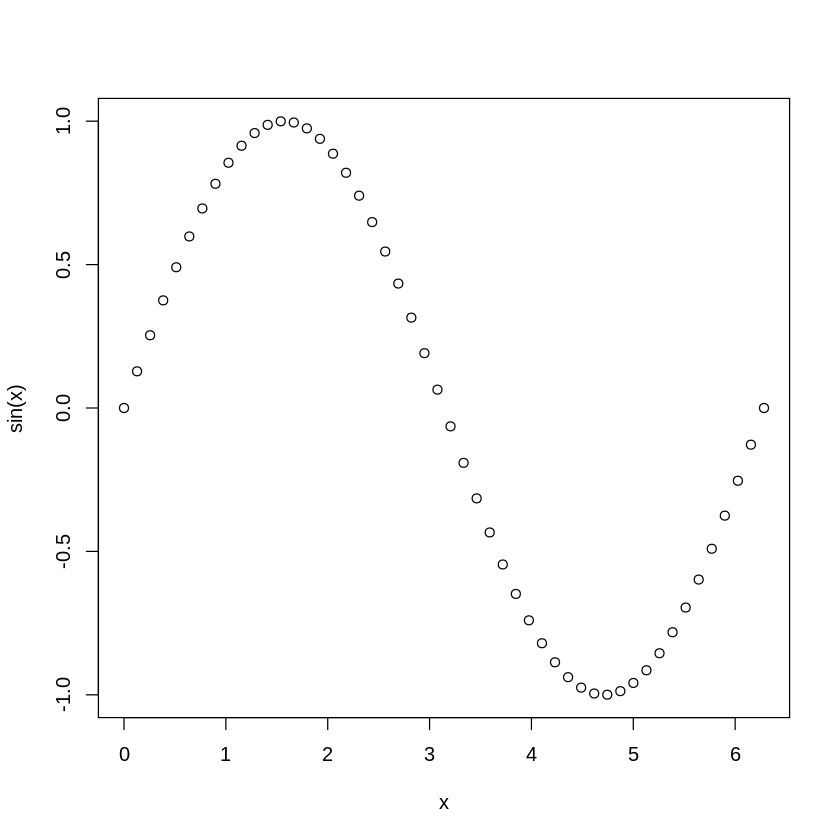

In [5]:
x <- seq(0, 2*pi, length.out=50)
plot(x, sin(x))

# Linear regression on California housing

Import `dplyr` and other libraries

In [0]:
library(dplyr)

In [13]:
data <- read.csv('https://storage.googleapis.com/mledu-datasets/california_housing_train.csv')
test <- read.csv('https://storage.googleapis.com/mledu-datasets/california_housing_test.csv')
count_record <- count(data)
print(count_record)

count_record_test <- count(test)
print(count_record_test)

# A tibble: 1 x 1
      n
  <int>
1 17000
# A tibble: 1 x 1
      n
  <int>
1  3000


Scale housing_median_value for an easier learning rate

In [0]:
data$median_house_value_scaled <- data$median_house_value / 1000
test$median_house_value_scaled <- test$median_house_value / 1000


Build a model to predict the median_house_value_scaled from the total_rooms

In [27]:
colnames(data)

[1] "longitude"                 "latitude"                 
 [3] "housing_median_age"        "total_rooms"              
 [5] "total_bedrooms"            "population"               
 [7] "households"                "median_income"            
 [9] "median_house_value"        "median_house_value_scaled"

In [18]:
fit <- lm(median_house_value_scaled ~ total_rooms, data = data)
fit



Call:
lm(formula = median_house_value_scaled ~ total_rooms, data = data)

Coefficients:
(Intercept)  total_rooms  
  1.889e+02    6.969e-03  


### Predictions
Get the resulting predictions


In [14]:
predictions <- predict(fit, newdata = test)
head(predictions)

1        2        3        4        5        6 
215.9523 199.4000 213.8893 189.3432 197.5252 195.9710

In [19]:
install.packages("Metrics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Compare against the min and max housing median values

In [21]:

library(Metrics)
mean_squared_error <- mse(test$median_house_value_scaled, predictions)
root_mean_squared_error <- sqrt(mean_squared_error)
min_house_value <- min(test$median_house_value_scaled)
max_house_value <- max(test$median_house_value_scaled)
min_max_difference <- max_house_value - min_house_value
c(min=min_house_value, max=max_house_value, difference=min_max_difference, rmse=root_mean_squared_error)


min        max difference       rmse 
   22.5000   500.0010   477.5010   111.6855

Plot a sample of the median_house_value_scaled.

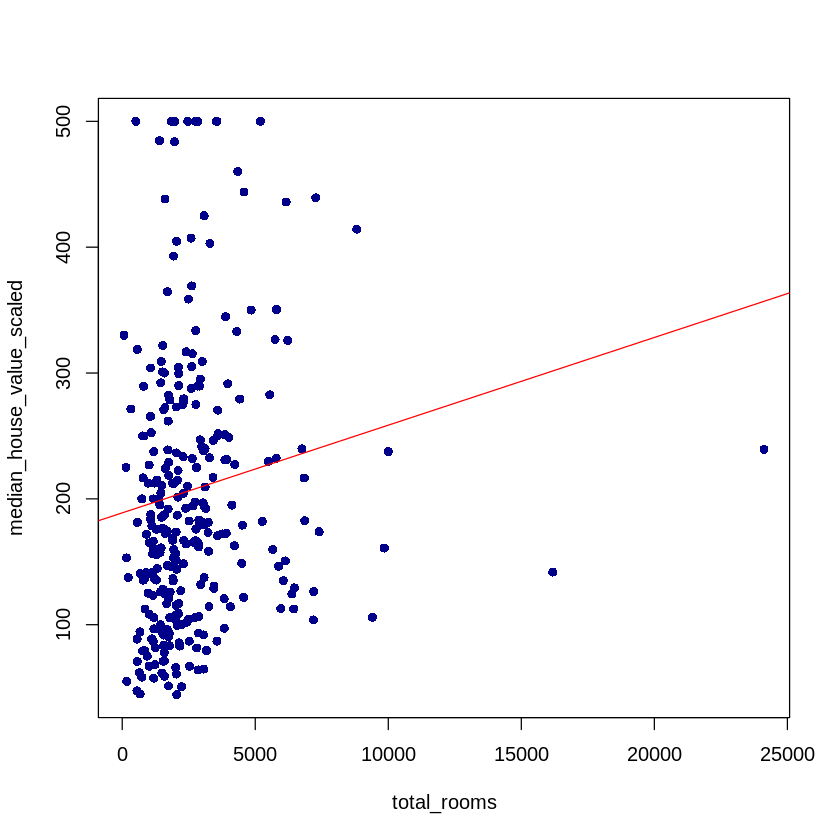

In [22]:
small <- test[sample(300),]
plot(median_house_value_scaled ~ total_rooms, data = small, pch=16, col='darkblue')
abline(fit, col='red')

Impore my model with more features

In [23]:
fit2 <- lm(median_house_value_scaled ~ . - median_house_value - population - households, data = data)
fit2


Call:
lm(formula = median_house_value_scaled ~ . - median_house_value - 
    population - households, data = data)

Coefficients:
       (Intercept)           longitude            latitude  housing_median_age  
        -3.498e+03          -4.102e+01          -3.968e+01           1.198e+00  
       total_rooms      total_bedrooms       median_income  
        -1.751e-02           1.108e-01           4.297e+01  


Get predictions:

In [26]:
predictions2 <- predict(fit2, newdata = test)
mean_squared_error2 <- mse(test$median_house_value_scaled, predictions2)
root_mean_squared_error2 <- sqrt(mean_squared_error2)
c(min=min_house_value, max=max_house_value, difference=min_max_difference, original_rmse=root_mean_squared_error, new_rmse=root_mean_squared_error2)

min           max    difference original_rmse      new_rmse 
     22.50000     500.00100     477.50100     111.68551      71.78533